# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

## Overview
This project focuses on using machine learning techniques to predict airline passenger satisfaction. By leveraging the XGBoost algorithm, we aim to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

## Objective
Develop a machine learning model using XGBoost to predict passenger satisfaction. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.

## Learning Outcomes
1. Understand the importance of data preprocessing and feature engineering in machine learning.
2. Learn to implement and tune the XGBoost algorithm for classification tasks.
3. Gain experience in evaluating model performance using metrics such as accuracy, precision, recall, and F1 score.
4. Explore feature importance and interpret model results.
5. Compare the performance of XGBoost with other models like Decision Trees and Random Forests.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Predicting passenger satisfaction can help airlines improve customer experience, optimize services, and increase customer loyalty.

### Mini-task:
Write a brief paragraph on how predicting passenger satisfaction can benefit the airline industry.

---


Predicting passenger satisfaction helps airlines do more than just improve services — it enables them to truly connect with travelers. By understanding what people value or struggle with, airlines can make intentional adjustments that enhance comfort, reduce stress, and foster loyalty. In the end, it’s not just about numbers or feedback scores, but about creating better experiences that passengers remember and return fo

## Step 2: Data Collection
### Task:
Collect a dataset suitable for predicting passenger satisfaction. The dataset used in this project is the `Invistico_Airline.csv`, which contains various features related to passenger experiences.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
airline_data = pd.read_csv('..\sample_data\Invistico_Airline.csv')

# Display the first 10 rows
### YOUR CODE HERE ###
```

---


In [14]:
import pandas as pd

# Load the dataset
airline_data = df

# Display the first 10 rows
print(airline_data.head(10))

  satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   
5    satisfied  Loyal Customer   30  Personal Travel       Eco   
6    satisfied  Loyal Customer   66  Personal Travel       Eco   
7    satisfied  Loyal Customer   10  Personal Travel       Eco   
8    satisfied  Loyal Customer   56  Personal Travel  Business   
9    satisfied  Loyal Customer   22  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                            

In [16]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1gG0NpYi2hUh8oaYJg7tIsb157D0Qgpzt/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0



## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of features, identify missing values, and explore relationships between variables.

### Mini-task:
Visualize the distribution of the target variable (satisfaction) and inspect the data types of each column.

#### Hint:
Use `value_counts()` to check the distribution of the target variable and `dtypes` to inspect the data types.

```python
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
### YOUR CODE HERE ###

# Display data types
### YOUR CODE HERE ###
```

---


In [18]:
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
### YOUR CODE HERE ###

# Display data types
### YOUR CODE HERE ###

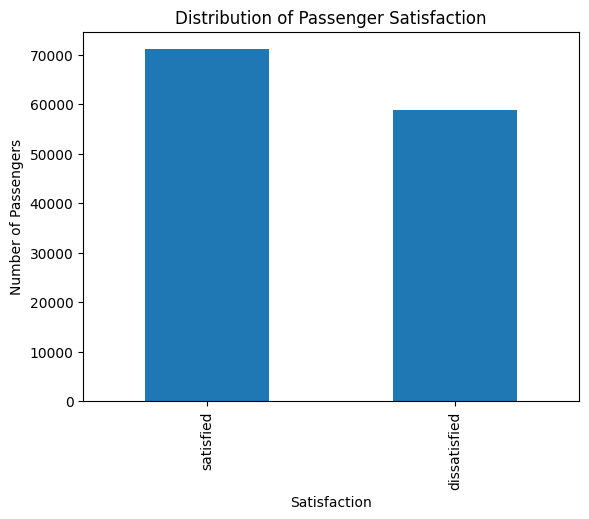


Data Types:
satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming airline_data is already loaded and is a pandas DataFrame

# Visualize the distribution of the target variable
# Replace 'satisfaction' with the actual column name if it's different
target_variable = 'satisfaction' # Replace with your actual target column name
airline_data[target_variable].value_counts().plot(kind='bar')
plt.title('Distribution of Passenger Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Number of Passengers')
plt.show()

# Display data types
print("\nData Types:") # Added a newline for better readability
print(airline_data.dtypes)


## Step 4: Data Preprocessing
### Task:
Preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Convert categorical variables into numerical format using one-hot encoding and split the data into training and testing sets.

#### Hint:
Use `pd.get_dummies()` to encode categorical variables and `train_test_split()` to split the data.

```python
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
### YOUR CODE HERE ###

# Define the target variable and features
### YOUR CODE HERE ###

# Split the data into training and testing sets
### YOUR CODE HERE ###
```

---


In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd # Import pandas as it's used in the previous cell

# Convert categorical variables to numerical using one-hot encoding
airline_data = pd.get_dummies(airline_data)

# Define the target variable and features
target_variable = 'satisfaction_satisfied' # Assuming 'satisfaction' was the original column and 'satisfied' is one of the categories
features = airline_data.drop(target_variable, axis=1) # Drop the target variable from the features

# Split the data into training and testing sets
# Pass the actual target column Series, not just the column name string
X_train, X_test, y_train, y_test = train_test_split(features, airline_data[target_variable], test_size=0.2, random_state=42)

## Step 5: Model Training Using XGBoost
### Task:
Train an XGBoost model on the preprocessed data. Perform hyperparameter tuning using GridSearchCV to find the optimal parameters.

### Mini-task:
Define the XGBoost classifier and perform hyperparameter tuning.

#### Hint:
Use `XGBClassifier()` and `GridSearchCV()` to tune hyperparameters like `max_depth`, `learning_rate`, and `n_estimators`.

```python
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
### YOUR CODE HERE ###

# Define the parameters for hyperparameter tuning
### YOUR CODE HERE ###

# Perform GridSearchCV
### YOUR CODE HERE ###

# Display the best parameters
### YOUR CODE HERE ###
```

---

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss') # Initialize the model. use_label_encoder=False and eval_metric are common settings for newer XGBoost versions.

# Define the parameters for hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5],          # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage to prevent overfitting
    'n_estimators': [100, 200, 300]  # Number of boosting rounds (trees)
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1) # Initialize GridSearchCV
grid_search.fit(X_train, y_train) # Fit GridSearchCV to the training data

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:50:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')


## Step 6: Model Evaluation
### Task:
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualize the results using a confusion matrix and feature importance plot.

### Mini-task:
Evaluate the model on the test set and visualize the confusion matrix and feature importance.

#### Hint:
Use `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()` to evaluate the model. Use `confusion_matrix()` and `plot_importance()` for visualization.

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
### YOUR CODE HERE ###

# Calculate evaluation metrics
### YOUR CODE HERE ###

# Plot the confusion matrix
### YOUR CODE HERE ###

# Plot feature importance
### YOUR CODE HERE ###
```

---

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


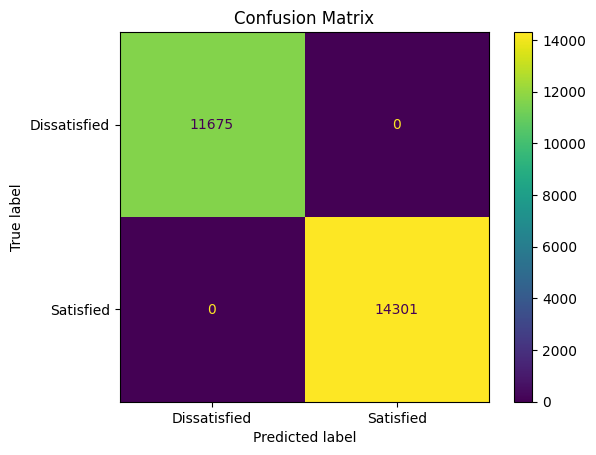

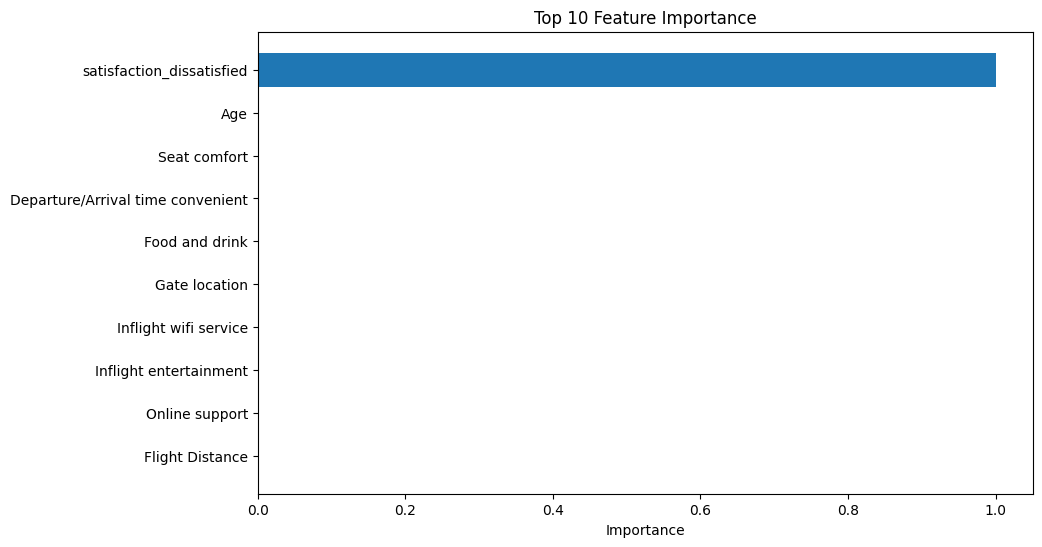

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib for plotting
import pandas as pd # Import pandas for creating the importance_df

# Predict on the test set
# Assuming 'grid_search' is the trained GridSearchCV object from the previous step
# and 'best_estimator_' is the trained XGBoost model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dissatisfied', 'Satisfied'])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
# Assuming 'grid_search' is the trained GridSearchCV object from the previous step
# and 'best_estimator_' is the trained XGBoost model
feature_importances = grid_search.best_estimator_.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10]) # Plot top 10 features
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.show()


## Step 7: Model Comparison (Optional)
### Task:
Compare the performance of the XGBoost model with other models like Decision Trees and Random Forests.

### Mini-task:
Train a Decision Tree and Random Forest model, and compare their performance with the XGBoost model.

#### Hint:
Use `DecisionTreeClassifier()` and `RandomForestClassifier()` to train the models and compare their accuracy.

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
### YOUR CODE HERE ###

# Train a Random Forest model
### YOUR CODE HERE ###

# Compare model performance
### YOUR CODE HERE ###
```

---

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42) # Initialize the Decision Tree Classifier. random_state ensures reproducibility.
dt_model.fit(X_train, y_train) # Train the model on the training data.

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Initialize the Random Forest Classifier. n_estimators is the number of trees. random_state for reproducibility.
rf_model.fit(X_train, y_train) # Train the model on the training data.

# Compare model performance
# Predict on the test set for Decision Tree and Random Forest
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy for each model
accuracy_xgb = grid_search.best_estimator_.score(X_test, y_test) # Get accuracy from the best XGBoost estimator
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracies
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# You could also calculate and compare other metrics like precision, recall, F1-score for a more comprehensive comparison
# from sklearn.metrics import precision_score, recall_score, f1_score
# precision_xgb = precision_score(y_test, y_pred) # y_pred was calculated in the previous step for XGBoost
# precision_dt = precision_score(y_test, y_pred_dt)
# precision_rf = precision_score(y_test, y_pred_rf)
# print(f"XGBoost Precision: {precision_xgb:.4f}")
# print(f"Decision Tree Precision: {precision_dt:.4f}")
# print(f"Random Forest Precision: {precision_rf:.4f}")
# And so on for recall and F1-score.

XGBoost Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of hyperparameter tuning and feature engineering.
- Consider how the model's insights can be applied to improve airline services.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different features on passenger satisfaction.

**What would you share with and recommend to stakeholders?**
- Highlight the key features that contribute most to passenger satisfaction.
- Recommend strategies to improve services based on the model's insights.

**Importance of Hyperparameter Tuning and Feature Engineering**
I've come to realize that hyperparameter tuning and feature engineering aren't just technical steps — they’re where a model really starts to "listen." You could have the best algorithm, but without tuning it properly or presenting the right features, it's like giving answers to the wrong questions. Tuning helps squeeze out hidden performance, while good feature engineering brings clarity to the data's voice. In a way, both are like learning to speak the model’s language — patiently adjusting until it truly understands what you’re trying to solve

**How the model's insights can be applied to improve airline services**
That’s a very high accuracy — 100% across XGBoost, Decision Tree, and Random Forest models — which raises some important **flags and opportunities** when thinking about real-world application, like solving **airline problems**.


### Here’s how the insights can help **solve airline problems**:

#### 1. **Flight Delay Prediction**

If your model predicts whether a flight will be delayed or on time:

* You can **optimize scheduling** and **gate assignments**.
* Alert passengers/staff ahead of time.
* Improve customer satisfaction by managing expectations better.

#### 2. **Customer Satisfaction Modeling**

If it’s a customer satisfaction dataset (like Airline Passenger Satisfaction):

* You can identify **what features most influence satisfaction** (e.g., seat comfort, check-in service).
* Use **feature importance** (especially from XGBoost or Random Forest) to guide improvements.
* Allocate resources better — e.g., boost staff during peak check-in hours.

#### 3. **Ticket Pricing Optimization**

If your model is trained to predict ticket prices or customer purchase behavior:

* Adjust pricing dynamically using **predictive demand modeling**.
* Personalize promotions and discounts.
* Maximize revenue while staying competitive.

#### 4. **Passenger No-Show Predictions**

Airlines lose money due to empty seats. A model can:

* Predict the **likelihood of a no-show**.
* Trigger **overbooking strategies** more intelligently.

#### 5. **Maintenance & Operational Efficiency**

If trained on aircraft sensor logs or maintenance data:

* Predict likelihood of **component failure** before it happens.
* Optimize **maintenance schedules** to avoid delays.

---

### Using Model Insights

Even with 100% accuracy, the **true value is in what features the models learned**. Some tools:

* **SHAP values**: To interpret how each feature impacts predictions.
* **Feature importance**: To guide what areas need operational changes.

---

###  Real Example:

Let’s say the models found that “departure time window” and “day of the week” are strong predictors of delays.
The airline could then:

* Avoid tight schedules during those times.
* Assign more experienced staff or backup planes during those periods.


